# Spaitial Visualization of MT Datasets 

Fei Zhang 

2018-10


In [1]:
import os, sys,glob
from IPython.display import display
from shapely.geometry import mapping
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

In [2]:
def csv_latlon2points(csvfile):
    """MT station locations"""
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GDA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [25]:
# User input csv file  and output dir
path2csv='E:/Githubz/mtpy/examples/data/CSVFiles/phase_tensor_1.0547Hz.csv' # a csv file with data across UTM zones [54,55]
path2csv='E:/Githubz/mtpy/examples/data/CSVFiles/GA_UA_Phase_tensor_tipper_period2048s.csv'
# path2csv='E:/Githubz/mtpy/examples/data/CSVFiles/phase_tensor_tipper_11.2Hz.csv'

output_dir ="C:/tmp20181022"

basename = os.path.basename(path2csv)[:-4]
print(basename)

GA_UA_Phase_tensor_tipper_period2048s


In [26]:
mygdf=csv_latlon2points(path2csv)

# mygdf.head()
mygdf.shape

(88, 14)

In [27]:
mygdf.crs

{'init': 'epsg:4283'}

In [28]:
shape_fname= "%s.shp"%basename 
outshp=os.path.join(output_dir,shape_fname)
mygdf.to_file(outshp, driver='ESRI Shapefile')


Text(0.5,1,u'phase tensor ellipses')

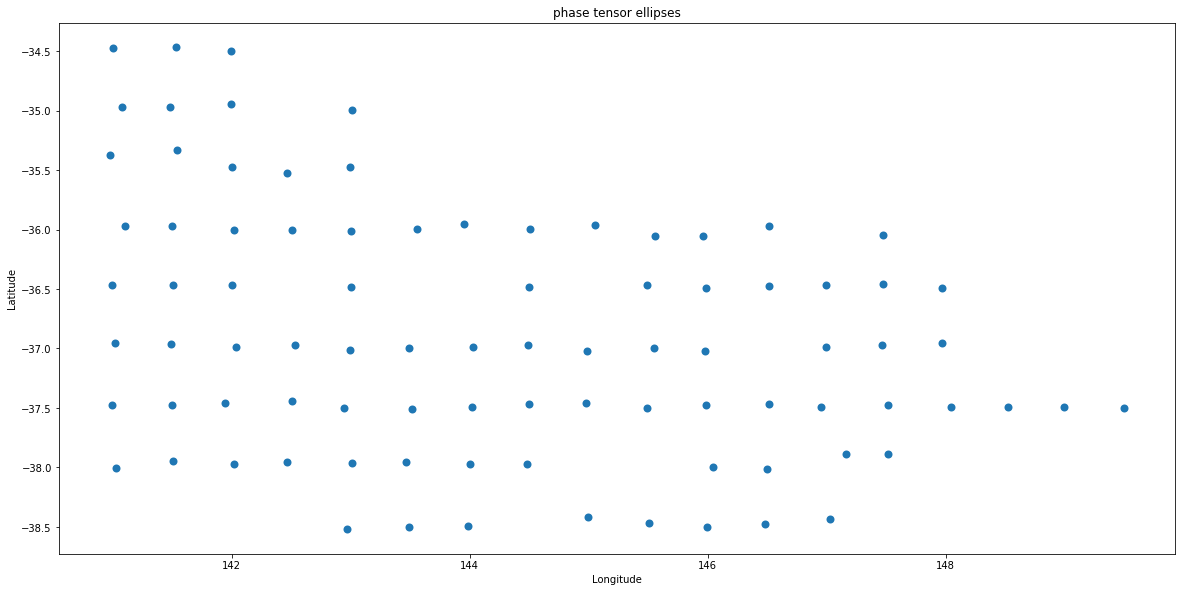

In [29]:
title_str='phase tensor ellipses'
myax = mygdf.plot(figsize=[20,10], linewidth=2.0)

#myax.set_xlim([140.5,141.0])
#myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

In [30]:
mygdf['lat'].describe()

count    88.000000
mean    -36.880693
std       1.046893
min     -38.517000
25%     -37.500000
50%     -36.989500
75%     -36.037000
max     -34.470000
Name: lat, dtype: float64

## Transform to shape files with different projections: wgs84, utm, etc.

Text(0.5,1,u'phase tensor ellipses- Projected Coord System 3112 GDA94/GALambert Conformal')

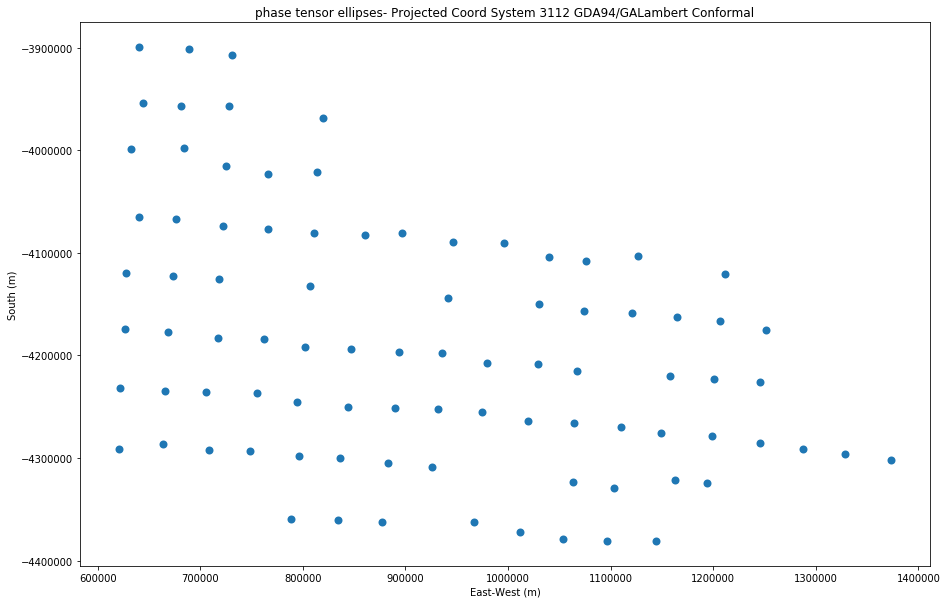

In [31]:
myax= mygdf.to_crs({'init':'epsg:3112'}).plot(figsize=[20,10], linewidth=2.0)  # 3112 is GDA94/GALambertConformal
myax.set_xlabel('East-West (m)')
myax.set_ylabel('South (m)')
myax.set_title(title_str + "- Projected Coord System 3112 GDA94/GALambert Conformal")

Text(0.5,1,u'phase tensor ellipsesProjected Coord System EPSG3577 - GDA94 / Australian Albers ')

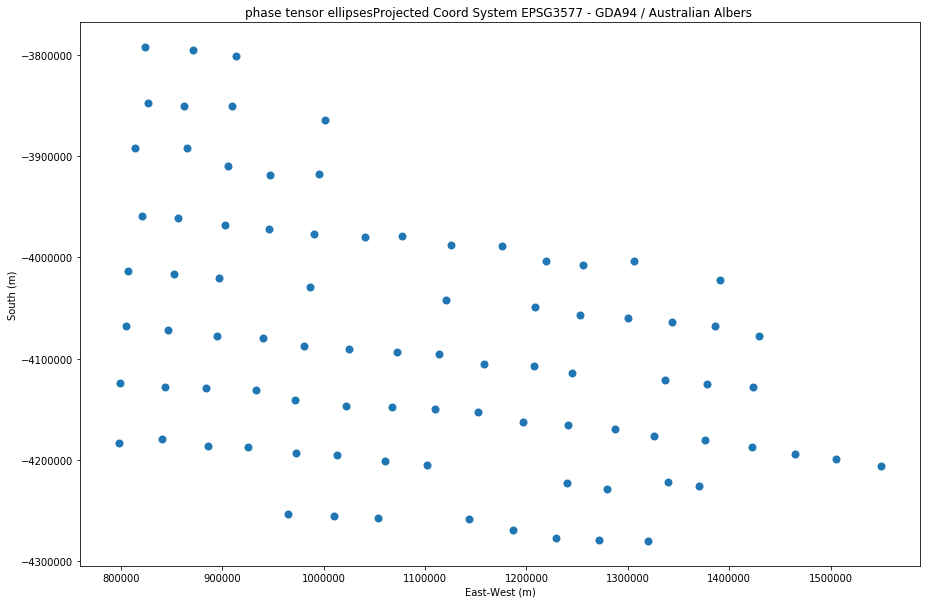

In [32]:
myax=mygdf.to_crs({'init':'epsg:3577'}).plot(figsize=[20,10], linewidth=2.0)  #EPSG Projection 3577 - GDA94 / Australian Albers 

myax.set_xlabel('East-West (m)')
myax.set_ylabel('South (m)')
myax.set_title(title_str + "Projected Coord System EPSG3577 - GDA94 / Australian Albers ")

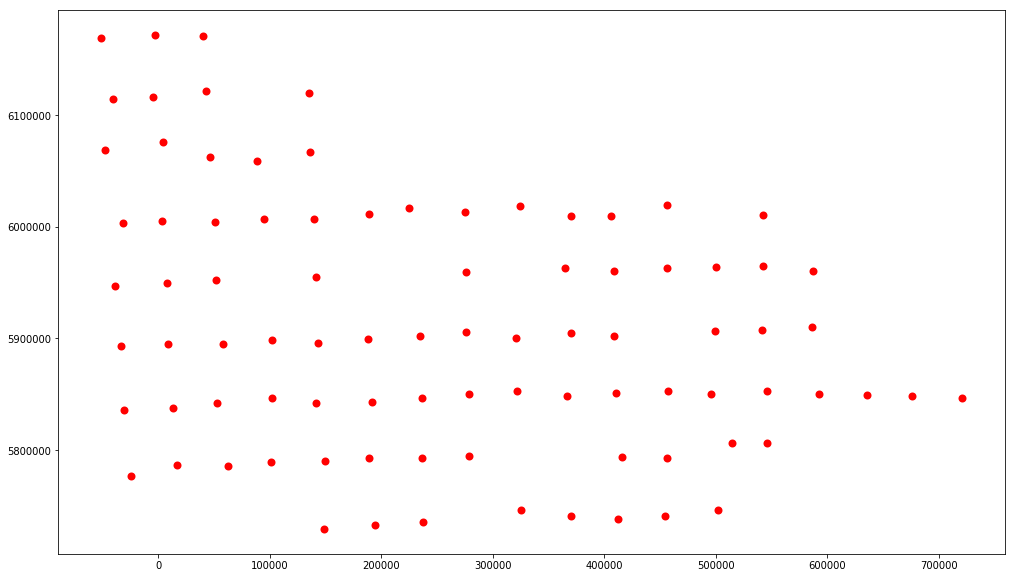

In [33]:
mygdf.to_crs({'init':'epsg:28355'}).plot(figsize=[20,10], linewidth=2.0,color='r') #28355 http://spatialreference.org/ref/epsg/gda94-mga-zone-55/

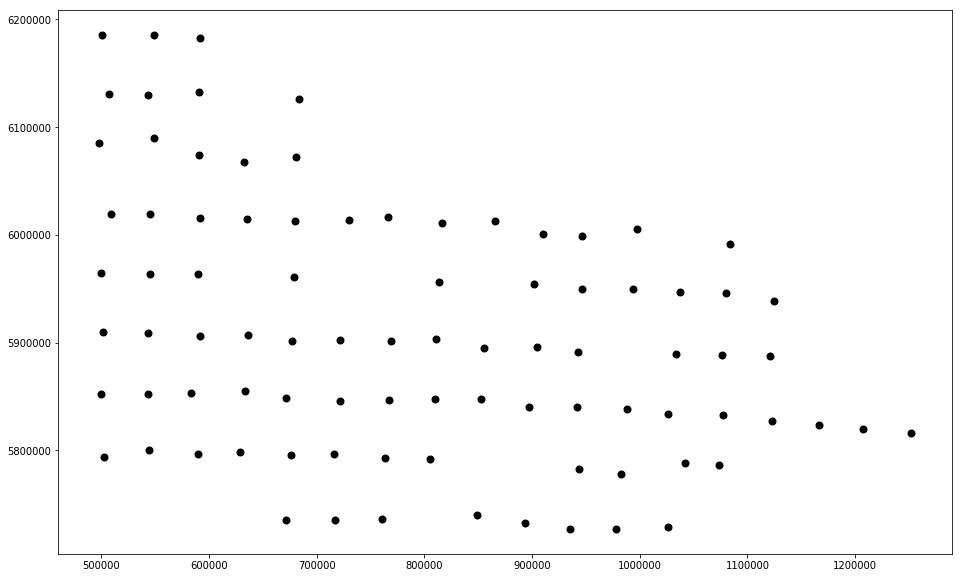

In [34]:
mygdf.to_crs({'init':'epsg:32754'}).plot(figsize=[20,10], linewidth=2.0, color='k') #32755 is WGS84/UTMS54

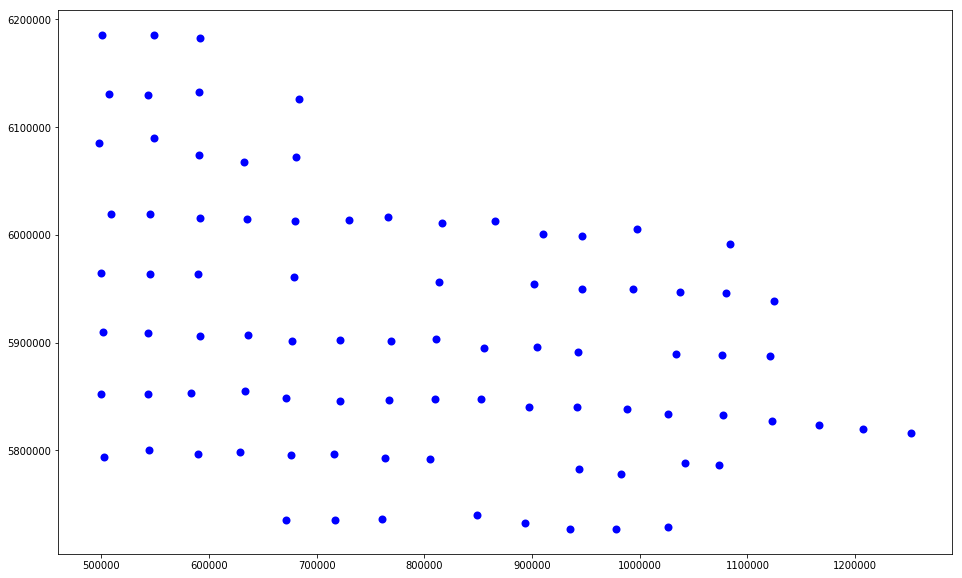

In [35]:
mygdf.to_crs({'init':'epsg:32754'}).plot(figsize=[20,10], linewidth=2.0, color='b') #32754 is WGS84/UTMS54

In [36]:
## re-project the geopandas df into different epsg, then write out to shape files.

gdf_utm54=mygdf.to_crs({'init':'epsg:32754'})  #.plot()

outshp=os.path.join(output_dir,'%s_utm54.shp'%basename)

gdf_utm54.to_file(outshp, driver='ESRI Shapefile')


In [37]:
# to other formats

# geojson = mygdf.to_json()
# bounds = mygdf.total_bounds
# print geojson

## Plot other properties

In [38]:
mygdf.columns

Index([u'station', u'file', u'lon', u'lat', u'phi_min', u'phi_max', u'skew',
       u'elliptic', u'azimuth', u'tip_mag_re', u'tip_ang_re', u'tip_mag_im',
       u'tip_ang_im', u'geometry'],
      dtype='object')

In [39]:
mygdf['skew'].describe()

count    88.000000
mean      3.960341
std      12.129136
min     -40.320000
25%      -0.662500
50%       4.135000
75%       9.522500
max      61.990000
Name: skew, dtype: float64

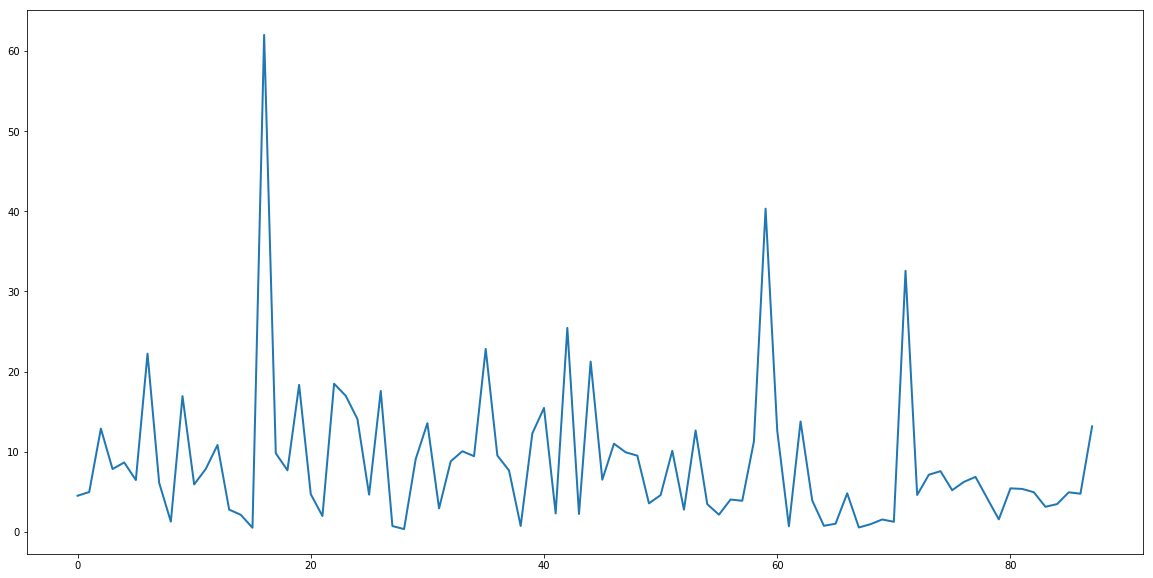

In [40]:
mygdf['skew'].abs().plot(figsize=[20,10], linewidth=2.0)

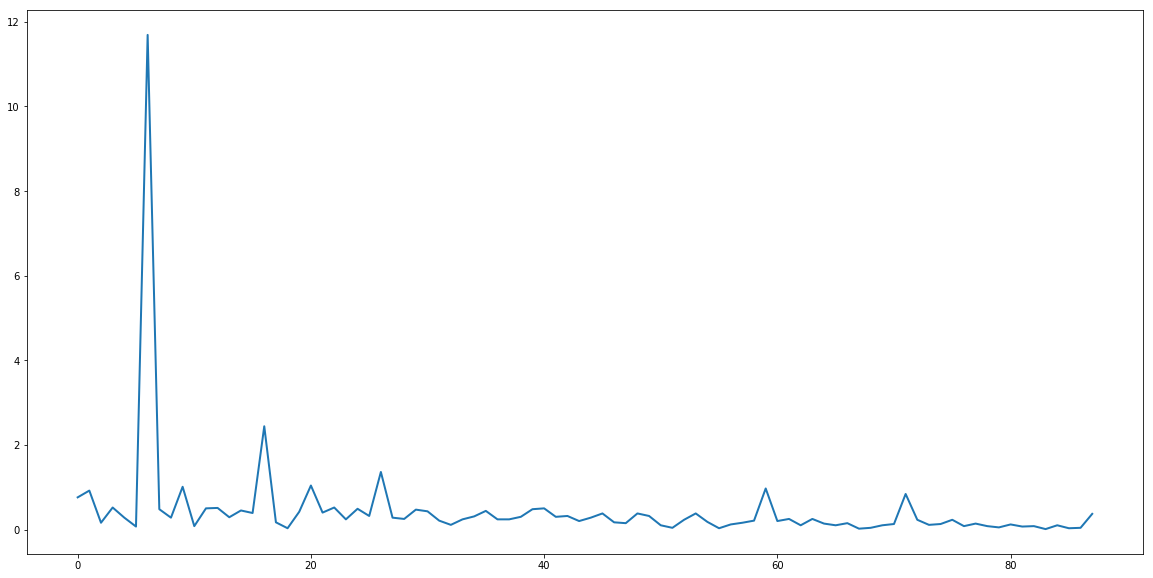

In [41]:
mygdf['elliptic'].plot(figsize=[20,10], linewidth=2.0)

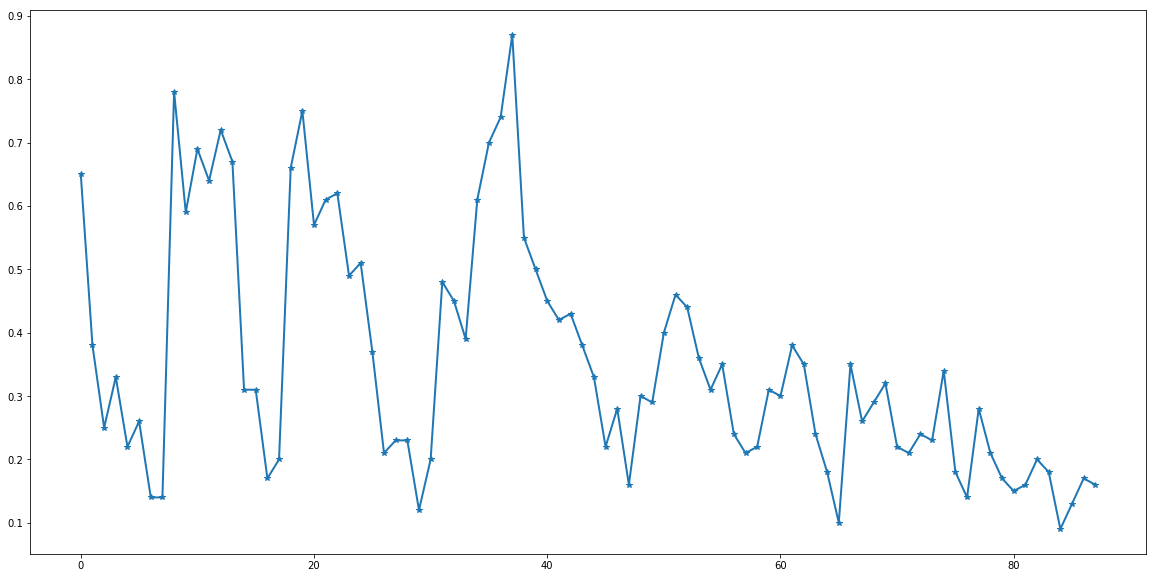

In [42]:
mygdf['tip_mag_re'].plot(marker='*',figsize=[20,10], linewidth=2.0)  

#mygdf['tip_ang_re'].plot(marker='*')  

# Construct Phase-Tensor-Ellipses 


In [43]:

import numpy as np
from shapely.geometry import Point, Polygon, LinearRing

def create_phase_tensor_ellipse_shp(csvfile, esize=0.03):
    """ create phase tensor ellipse
    esize is ellipse size, defaut 0.03 is about 3KM in the max ellipse rad
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    
    # make  pt_ellispes using polygons
    PHIMAX=pdf['phi_max'].max() # the max of this group of ellipse
    
    print PHIMAX
    
    theta = np.arange(0, 2 * np.pi, np.pi / 30.) # points to trace out the polygon-ellipse
 
    azimuth = -np.deg2rad(pdf['azimuth'])
    width = esize * (pdf['phi_max'] /PHIMAX)
    height = esize * (pdf['phi_min'] / PHIMAX)
    x0 = pdf['lon']
    y0 = pdf['lat']

# apply formula to generate ellipses
  
    ellipse_list=[]
    for i in xrange(0, len(azimuth)):
        x = x0[i] + height[i] * np.cos(theta) * np.cos(azimuth[i]) - width[i] * np.sin(theta) * np.sin(azimuth[i])
        y = y0[i] + height[i] * np.cos(theta) * np.sin(azimuth[i]) + width[i] * np.sin(theta) * np.cos(azimuth[i])

        polyg= Polygon(LinearRing([xy for xy in zip(x, y) ]))
        
        #print polyg  # an ellispe
        
        ellipse_list.append(polyg)
        
    
#     for xi, yi in zip(x, y):
#         polyg.(np.round(xi, 6), np.round(yi, 6))
        
        
#                     # 1) make a geometry shape of the ellipse
#                     ellipse = ogr.Geometry(ogr.wkbLinearRing)
#                     ellipse.CloseRings()

#                     # 2) make a polygon
#                     poly = ogr.Geometry(ogr.wkbPolygon)
#                     poly.AddGeometry(ellipse)

#                     poly_list.append(poly)

    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=ellipse_list)
    
    return pdf

In [47]:
p = create_phase_tensor_ellipse_shp(path2csv, esize=0.2) # adjust the  ellipses size esize


88.26


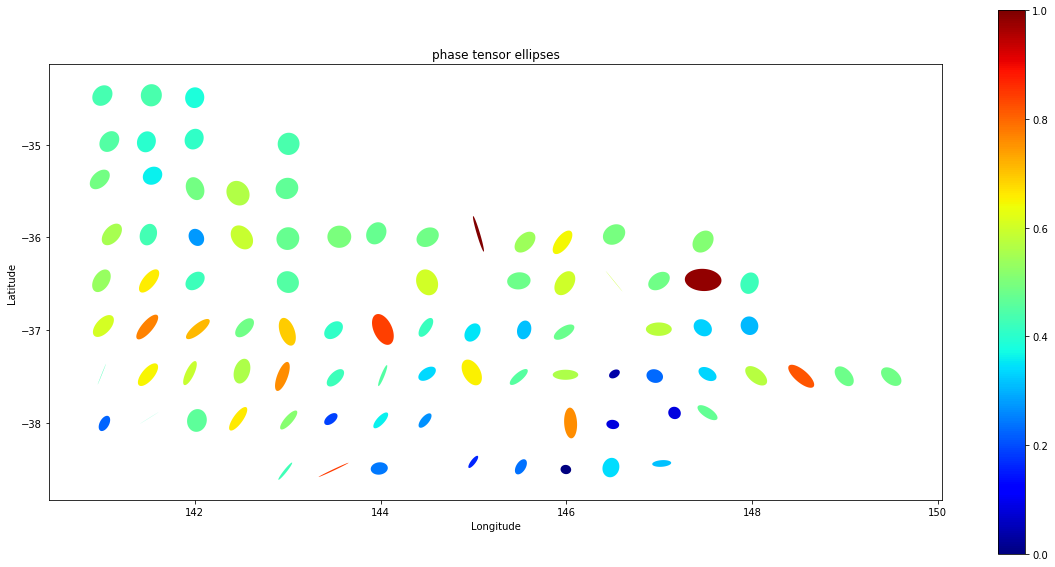

In [48]:

import matplotlib.pyplot as plt

myax = p.plot(figsize=[20,10], linewidth=2.0, column='phi_max', colormap='jet') # , vmin=vmin, vmax=vmax)

#myax.set_xlim([140.2,141.2])
#myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

# add colorbar
fig = myax.get_figure()
cax = fig.add_axes() #([0.7, 0.05, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='jet') #, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

# Overlay onto a map

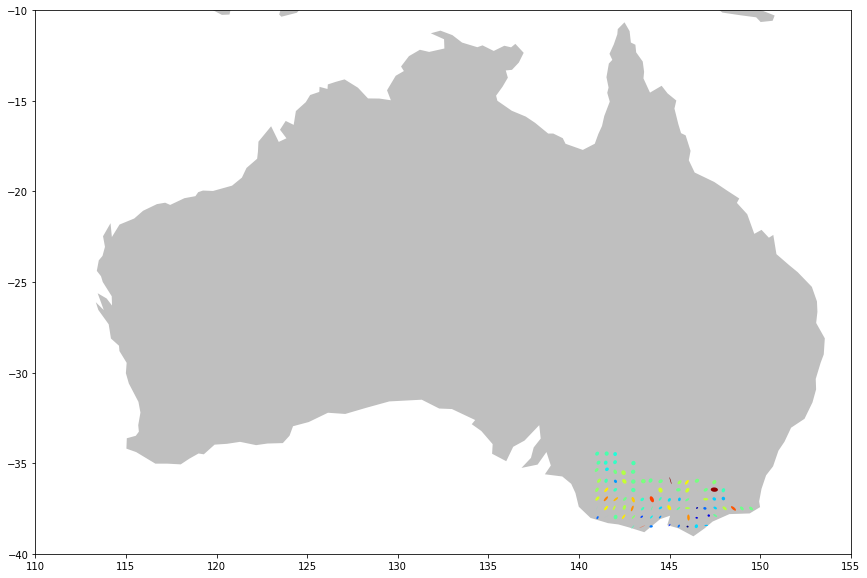

In [49]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5, figsize=[20,10], color='grey')

# all australia limit

myax.set_xlim([110,155])
myax.set_ylim([-40,-10])

# myax.set_xlim([130,140])
# myax.set_ylim([-22,-20])
              
#mygdf.plot(ax=myax, figsize=(10, 20), marker='o', color='blue', markersize=2);
p.plot(ax=myax, column='phi_max', colormap='jet')